Epoch 1/200
38/38 [==============================] - 7s 43ms/step - loss: 592.0012 - val_loss: 662.7113
Epoch 2/200
38/38 [==============================] - 0s 13ms/step - loss: 557.1949 - val_loss: 597.8326
Epoch 3/200
38/38 [==============================] - 1s 13ms/step - loss: 468.9919 - val_loss: 473.3843
Epoch 4/200
38/38 [==============================] - 1s 18ms/step - loss: 346.7516 - val_loss: 338.1539
Epoch 5/200
38/38 [==============================] - 1s 16ms/step - loss: 237.9798 - val_loss: 235.9759
Epoch 6/200
38/38 [==============================] - 1s 22ms/step - loss: 168.1171 - val_loss: 178.3243
Epoch 7/200
38/38 [==============================] - 1s 15ms/step - loss: 134.8248 - val_loss: 151.2725
Epoch 8/200
38/38 [==============================] - 1s 18ms/step - loss: 122.3468 - val_loss: 140.4294
Epoch 9/200
38/38 [==============================] - 1s 24ms/step - loss: 117.8584 - val_loss: 135.6652
Epoch 10/200
38/38 [==============================] - 1s 24ms/st

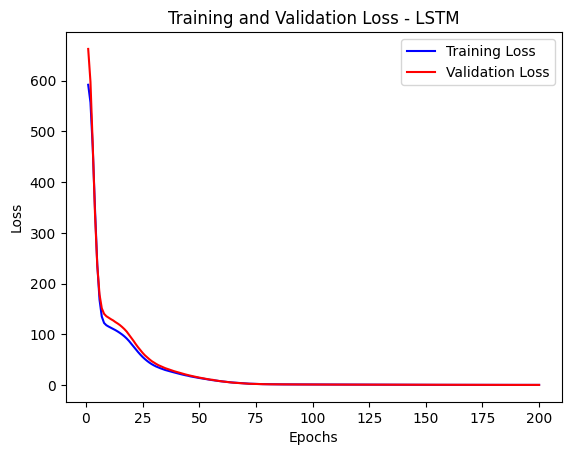

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/sbkowshik/energy-consumption-prediction/main/Household_electricity_dataset.csv')

# Preprocess the data
X = data.drop(columns=['Value'])
X = data.drop(columns=['Date']) # Features
y = data['Value']  # Target variable

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=16, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history=model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss - LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

10/10 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.311665444857963
Root Mean Squared Error (RMSE): 0.3889042130741923
R-squared (R2): 0.9991507331073949


In [3]:
# Flatten y_test and y_pred arrays
y_test_flattened = y_test.values.flatten()
y_pred_flattened = y_pred.flatten()

# Define a threshold for accuracy (e.g., within +/- 5%)
threshold = 0.05

# Calculate absolute percentage error
absolute_percentage_error = np.abs((y_test_flattened - y_pred_flattened) / y_test_flattened)

# Calculate accuracy based on the threshold
accuracy = np.mean(absolute_percentage_error <= threshold)

print("Accuracy (within +/- 5%):", accuracy)


Accuracy (within +/- 5%): 0.9533333333333334


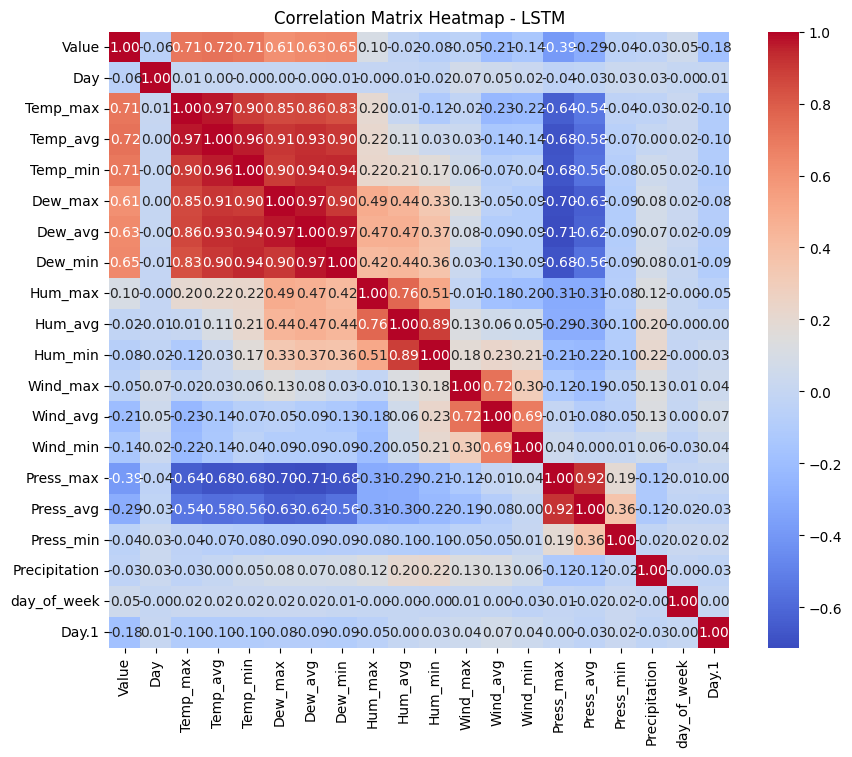

In [10]:
import seaborn as sns

corr_matrix = data.drop(columns=['Date']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap - LSTM')
plt.show()